In [1]:
import json
from glob import glob
import os
from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np

In [2]:
contrail_labels = ['barely_visible', 'partly_visible', 'clearly_visible']
no_contrail_labels = ['no_contrail_bad_visibility', 'no_contrail_okay_visibility', 'no_contrail_good_visibility']

confirmed_contrail_flight_ids_barely_visible = ['A5B760_AAL2701', 'AD3FD9_AAL630', 'AC0D21_FDX1585']
confirmed_contrail_flight_ids_partly_visible = ['A8264F_NKS1301', 'A87CBB_NKS3742', 'AC8CF1_AAL2308']
confirmed_contrail_flight_ids_clearly_visible = ['A03765_AAL300', 'A1463A_AAL2864', 'A0DADB_UPS855', 'A4B41C_AAL2328', 'ABB90D_SWA3676', 'A51B27_UPS853', 'A8C397_FDX1417', 'A28E5B_FDX1678', 'A22BF0_SWA279']

label_files = glob('../data/gmn_extracted_flight_images/US0001/*/*/metadata/label.json')

date_dict = {f'202308{str(x).zfill(2)}': {'contrail': 0, 'no_contrail': 0} for x in range(1, 30)}
label_dict = defaultdict(set)

flight_ids = set()
for label_file in label_files:
    with open(label_file, 'r') as f:
        label = json.load(f)

    flight_dir = os.path.dirname(os.path.dirname(label_file))
    flight_id = os.path.basename(flight_dir)
    date = os.path.basename(os.path.dirname(flight_dir))
    label_dict[label['label']].add(flight_id)
    
    if flight_id in flight_ids and flight_id in (confirmed_contrail_flight_ids_barely_visible + confirmed_contrail_flight_ids_partly_visible + confirmed_contrail_flight_ids_clearly_visible):
        print('duplicate')

    flight_ids.add(flight_id)

    if label['label'] in contrail_labels:
        date_dict[date]['contrail'] += 1
    elif label['label'] in no_contrail_labels:
        date_dict[date]['no_contrail'] += 1

for contrail_label in contrail_labels:
    print(contrail_label, label_dict[contrail_label])

barely_visible {'A5B760_AAL2701', 'AD3FD9_AAL630', 'AC0D21_FDX1585'}
partly_visible {'A8264F_NKS1301', 'A87CBB_NKS3742', 'AC8CF1_AAL2308'}
clearly_visible {'A8C397_FDX1417', 'A1463A_AAL2864', 'A0DADB_UPS855', 'ABB90D_SWA3676', 'A51B27_UPS853', 'A28E5B_FDX1678', 'A03765_AAL300', 'A22BF0_SWA279', 'A4B41C_AAL2328'}


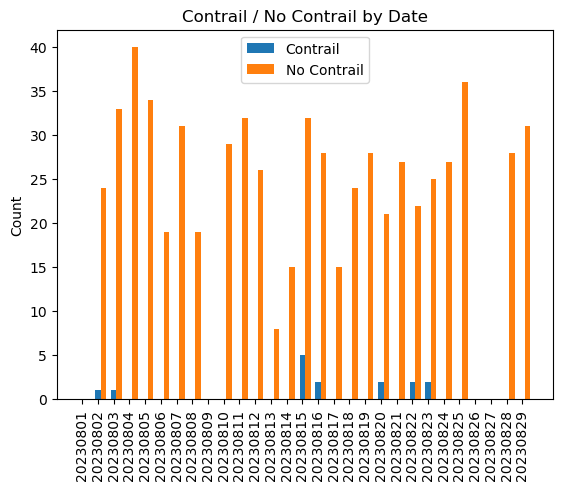

In [3]:
# Make a histogram showing distribution of no contrail / contrail by date
fig, ax = plt.subplots()
dates = sorted(date_dict.keys())
contrail_counts = [date_dict[date]['contrail'] for date in date_dict]
no_contrail_counts = [date_dict[date]['no_contrail'] for date in date_dict]
width = 0.35
ax.bar(range(len(dates)), contrail_counts, width, label='Contrail')
ax.bar(np.array(range(len(dates))) + width, no_contrail_counts, width, label='No Contrail')
ax.set_ylabel('Count')
ax.set_title('Contrail / No Contrail by Date')
ax.set_xticks(range(len(dates)))
ax.set_xticklabels(dates)
ax.legend()
plt.xticks(rotation=90)
plt.show()